<a href="https://colab.research.google.com/github/RewinaB/HR-Data-Analysis/blob/main/DTs_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees Regression

Importing the packages:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [4]:
rand_state = 1000

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/wage.csv")

In [6]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


## Data preprocessing

In [8]:
df.isna().sum()

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [9]:
df.drop('feduc', axis=1, inplace=True)

In [10]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    935 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 73.2 KB


In [11]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

### Defining the variables and splitting the data

In [12]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [13]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


### Scaling the features:


For tree based models, there is no need to scale the features! (No distance metrics is used)

###  DTs regression with Sklearn

### Decision Tree Parameters

The following table lists key parameters available for this purpose in the sklearn decision tree implementation. After introducing the most important parameters, we will illustrate how to use cross-validation to optimize the hyperparameter settings with respect to the bias-variance tradeoff and lower prediction errors:

| Parameter                | Default | Options                                                                                                                                                               | Description                                                                                                                                                                                                             |
|--------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| criterion                | gini    | Regression: MSE, MAE Classification: Gini impurity, Cross Entropy                                                                                                     | Metric to evaluate split quality.                                                                                                                                                                                       |
| splitter                 | best    | best, random                                                                                                                                                          | How to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.                                                                            |
| max_depth                | None    | int                                                                                                                                                                   | Max # of levels in tree. Split nodes until max_depth is reached or all leaves are pure or all leaves contain less than min_samples_split samples.                                                                       |
| max_features             | None    | None: max_features=n_features; int; float (fraction): int(max_features * n_features)  auto, sqrt: max_features=sqrt(n_features). log2: max_features=log2(n_features). | # of features to consider when evaluating split                                                                                                                                                                         |
| max_leaf_nodes           | None    | None: unlimited # of leaf nodes int                                                                                                                                   | Continue to split nodes that reduce relative impurity the most until reaching max_leaf_nodes.                                                                                                                           |
| min_impurity_decrease    | 0       | float                                                                                                                                                                 | Split node if impurity decreases by at least this value.                                                                                                                                                                |
| min_samples_leaf         | 1       | int; float (as percentage of N)                                                                                                                                       | Minimum # of samples to be at a leaf node. A split will only be considered if there are at least min_samples_leaf training samples in each of the left and right branches. May smoothen the model, esp. for regression. |
| min_samples_split        | 2       | int; float (as percentage of N)                                                                                                                                       | The minimum number of samples required to split an internal node:                                                                                                                                                       |
| min_weight_fraction_leaf | 0       | NA                                                                                                                                                                    | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided (in fit method).                       |
| class_weight             | None    | balanced: inversely proportional to class frequencies dict: {class_label: weight} list of dicts (for multi-output)                                                    | Weights associated with classes                                                                                                                                                                                         |

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Fitting regression tree to the Training set
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
# Predicting the Test set results
y_hat = Tree_regressor.predict(X_test)

In [17]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
434,97500.0,66000.0
238,173000.0,138400.0
531,67500.0,69300.0
157,189900.0,63500.0
601,150000.0,160200.0


----

## Evaluating the model on test dataset¶

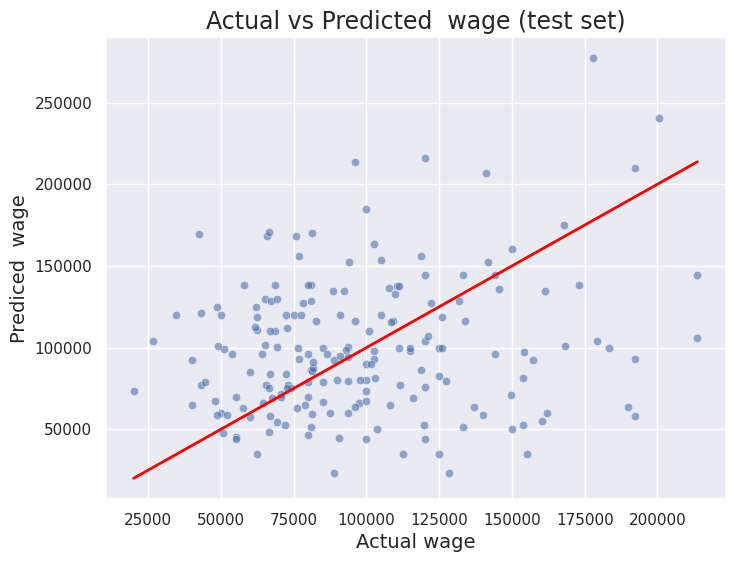

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [19]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

51167.0

**Exercise:** Now try max depth =1, what do you expect to see?

---

## Pruning the tree using cost complexity pruning method.
### Choosing $\alpha$ with cross validation.

### Cost complexity Pruning

The cost_complexity_pruning_path method of a decision tree classifier in Python's scikit-learn library returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. This method is used for cost-complexity pruning of the tree, which is a way to avoid overfitting by reducing the size of the tree.

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

The ccp_alphas are calculated by the algorithm rather than being set manually. They are determined based on the structure and characteristics of the decision tree that is built from your data.

When you call the cost_complexity_pruning_path method, the algorithm goes through the tree and calculates these alpha values by evaluating the effect of pruning each node on the overall impurity of the tree. It's a data-driven process, and the resulting ccp_alphas are specific to the tree that was built from your dataset.

* The cost_complexity_pruning_path function generates a sequence of candidate values for alpha by exploring the pruning path from the largest subtree to the smallest subtree.
* The function then computes the effective value of alpha for each subtree as the difference in cost complexity between the parent subtree and the current subtree, divided by the number of leaves removed in the pruning step. The effective value of alpha for the largest subtree is set to zero.
* The function returns an array of the effective values of alpha for each subtree in the pruning path, which can be used to select the optimal value of alpha for pruning the decision tree.

In [22]:
len(ccp_alphas)

619

In [23]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [24]:
path

{'ccp_alphas': array([0.00000000e+00, 6.68449198e+00, 6.68449198e+00, 6.68449198e+00,
        2.67379679e+01, 2.67379679e+01, 2.67379679e+01, 2.67379679e+01,
        6.01604278e+01, 6.01604278e+01, 6.01604278e+01, 1.06951872e+02,
        1.06951872e+02, 1.06951872e+02, 1.06951872e+02, 1.06951872e+02,
        1.67112299e+02, 1.67112299e+02, 2.40641711e+02, 2.40641711e+02,
        2.40641711e+02, 4.27807487e+02, 4.27807487e+02, 5.41443850e+02,
        5.41443850e+02, 5.70409982e+02, 6.68449198e+02, 6.68449198e+02,
        6.68449198e+02, 8.08823529e+02, 8.08823529e+02, 8.08823529e+02,
        8.08823529e+02, 9.62566845e+02, 9.62566845e+02, 9.62566845e+02,
        1.12967914e+03, 1.12967914e+03, 1.31016043e+03, 1.31016043e+03,
        1.31016043e+03, 1.50401070e+03, 1.50401070e+03, 1.50623886e+03,
        1.62433155e+03, 1.71122995e+03, 1.71122995e+03, 1.93181818e+03,
        1.93181818e+03, 2.00534759e+03, 2.00534759e+03, 2.00534759e+03,
        2.16577540e+03, 2.16577540e+03, 2.16577540

In [25]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000,54854.414987
1,6.684492,54854.414987
2,6.684492,54854.414987
3,6.684492,54854.414987
4,26.737968,54854.458035


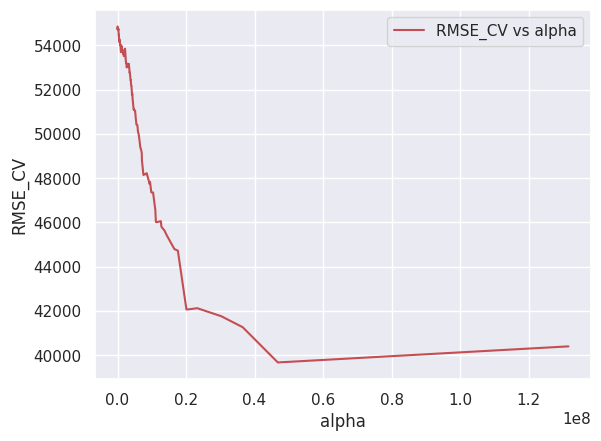

In [26]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [27]:
np.argmin(output['RMSE_CV'])

616

In [28]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      4.678526e+07
RMSE_CV    3.967243e+04
Name: 616, dtype: float64

In [29]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

46785257.914274335

Refit the DTs regressor with optimal alpha!

In [30]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [31]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

39960.7

In [32]:
optimal_DT.get_params()

{'ccp_alpha': 46785257.914274335,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## Visualizing the Tree
4 different ways of visualizing a tree in Python: https://mljar.com/blog/visualize-decision-tree/

Plot DT with **plot_tree** method from sklearn.

Let's visualize one simple tree with two features only.


In [33]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

In [34]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
wage_hat = dtree.predict(X_test)

In [35]:
from sklearn import tree

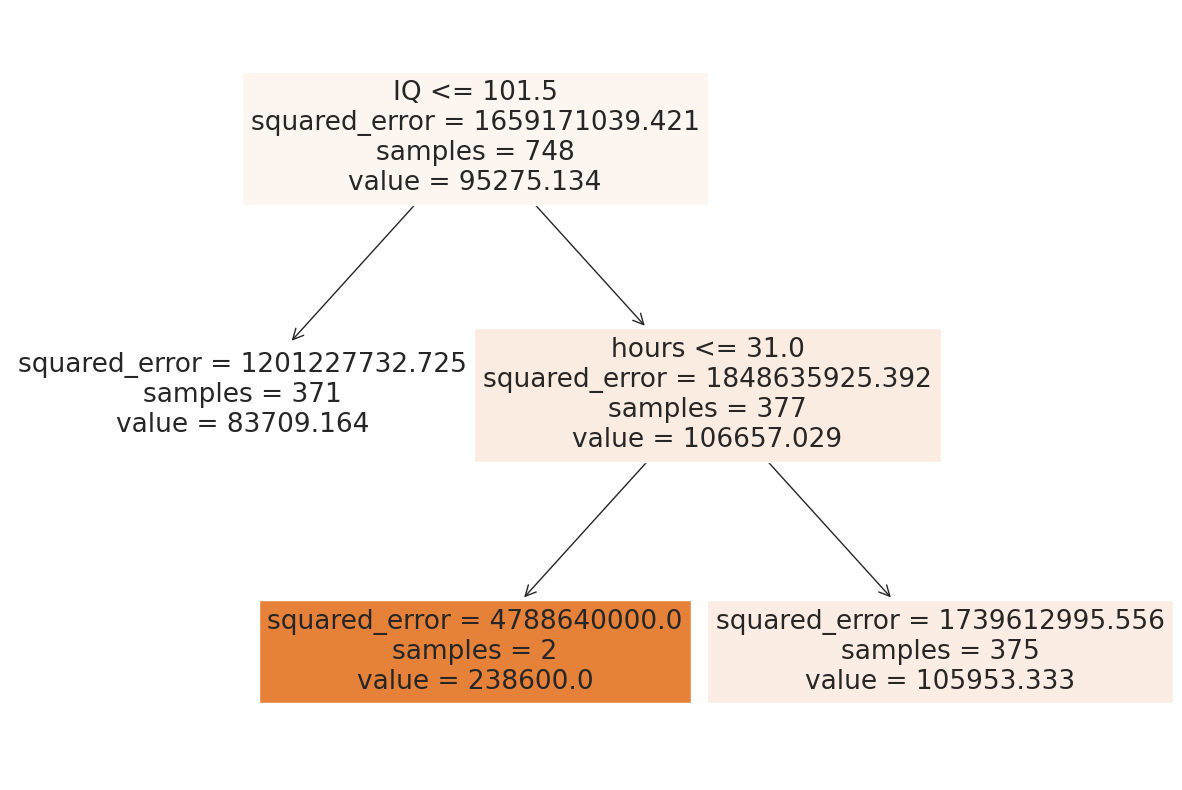

In [36]:
fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

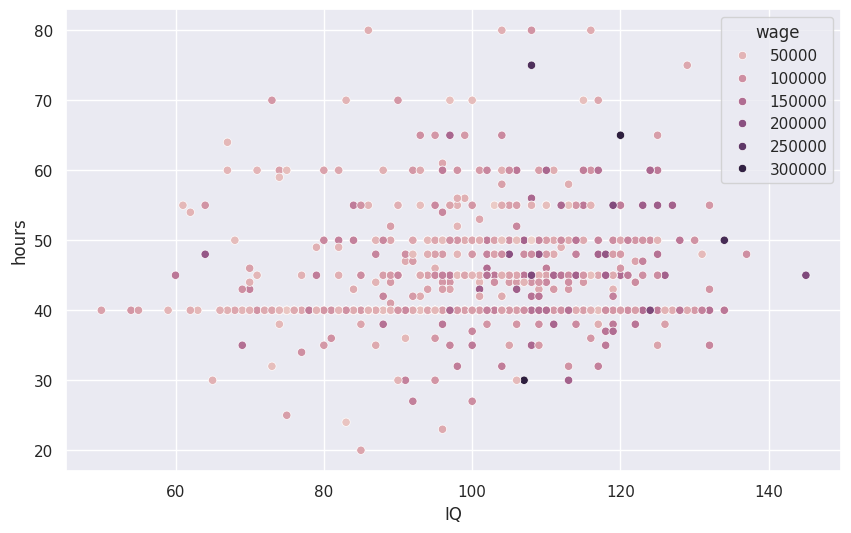

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IQ', y='hours', data=df, hue='wage')
plt.show()

In [38]:
fig.savefig("DT_plot_Regression.png")

### Do you want to see the regression line as well?

Let's try a tree regression with one feature only (say 'IQ')

In [39]:
dtree= DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train[['IQ']], y_train)
wage_hat = dtree.predict(X_test[['IQ']])

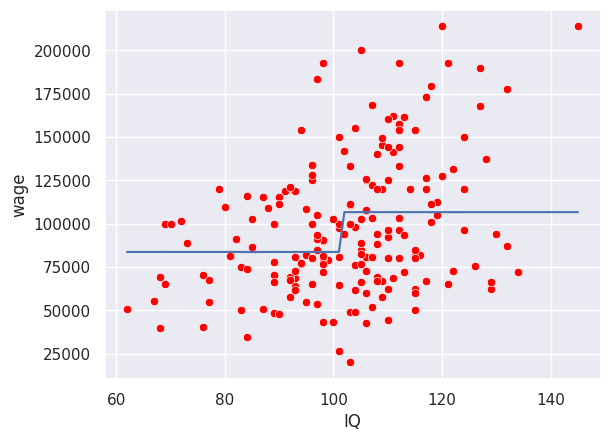

In [40]:
# visualizing the regression line
sns.scatterplot(x=X_test['IQ'], y=y_test, color='red')
sns.lineplot(x=X_test['IQ'], y=wage_hat)
plt.show()

In [41]:
dtree.score(np.array(X_test['IQ']).reshape(-1,1),y_test)

0.07393374074539127

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [42]:
#only if you want to run it in Google Colab:
# for this chapter, we can install the light version of PyCaret as below.
!pip install pycaret

In [43]:
#only if you want to run it in Google Colab:
# for this chapter, we can install the light version of PyCaret as below.

!pip install --pre pycaret

In [44]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button.

# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.3.0'

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/wage.csv")

In [46]:
df_py = df.copy()

In [47]:
df_py.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [48]:
from pycaret.regression import *


In [49]:
setup(data=df_py,  target='wage', session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,wage
2,Target type,Regression
3,Original data shape,"(935, 11)"
4,Transformed data shape,"(935, 11)"
5,Transformed train set shape,"(654, 11)"
6,Transformed test set shape,"(281, 11)"
7,Numeric features,10
8,Rows with missing values,22.8%
9,Preprocess,True


In [50]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [51]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36142.4242,2468503030.3030,49684.0319,-0.7638,0.5290,0.4917
1,38395.4545,2658098333.3333,51556.7487,-0.5064,0.4961,0.4125
2,44678.7879,3073808484.8485,55441.9380,-1.2802,0.5812,0.4987
3,35643.9394,2380268030.3030,48787.9906,-0.1683,0.4981,0.4142
4,53752.3077,5314083538.4615,72897.7609,-0.7920,0.6155,0.6571
5,36969.2308,2763442461.5385,52568.4550,-0.3655,0.4841,0.4079
6,37198.4615,2623885692.3077,51223.8781,-0.9103,0.5075,0.4559
7,36895.3846,2451237230.7692,49509.9710,-1.1426,0.4742,0.4478
8,40046.1538,2493926769.2308,49939.2308,-1.0871,0.5469,0.4941


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29468.4346,1427064117.9813,37776.5022,-0.0197,0.4370,0.4227
1,27319.1090,1585105975.9273,39813.3894,0.1017,0.3604,0.2974
2,26293.5937,1244348778.3431,35275.3282,0.0769,0.3864,0.3300
3,27803.2711,1474267155.1511,38396.1867,0.2764,0.3738,0.3442
4,34061.8327,2628225263.9633,51266.2195,0.1137,0.4706,0.4226
5,29745.6769,1793627884.1350,42351.2442,0.1137,0.3740,0.3196
6,30943.9671,1393939671.0679,37335.5015,-0.0149,0.4188,0.3853
7,27210.6493,1139288033.6286,33753.3411,0.0042,0.3752,0.3628
8,26294.6356,1151950382.1688,33940.3945,0.0360,0.4031,0.3443


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [53]:
plot_model(tuned_dt_reg, plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,3
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.002
min_samples_leaf,3
min_samples_split,10
min_weight_fraction_leaf,0.0
monotonic_cst,None


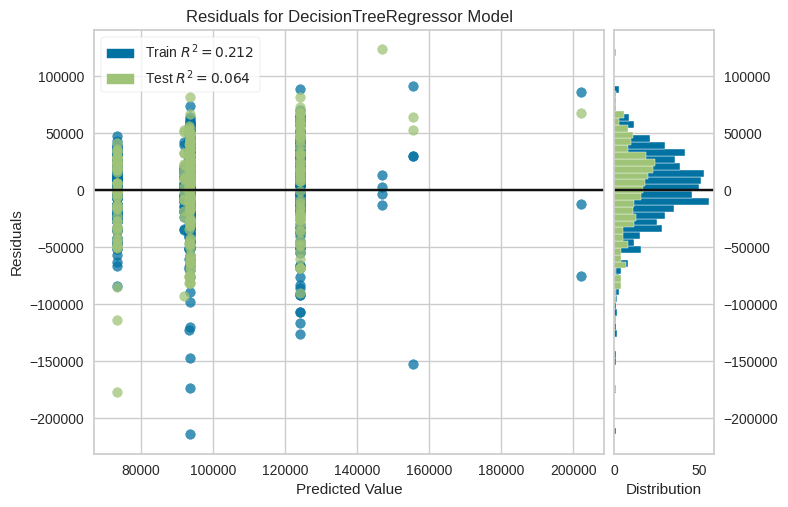

In [54]:
plot_model(tuned_dt_reg, plot = 'residuals')

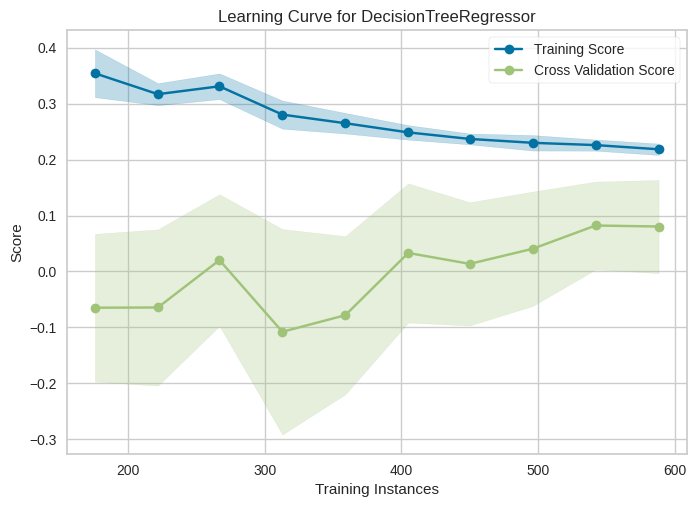

In [55]:
plot_model(tuned_dt_reg, plot = 'learning')

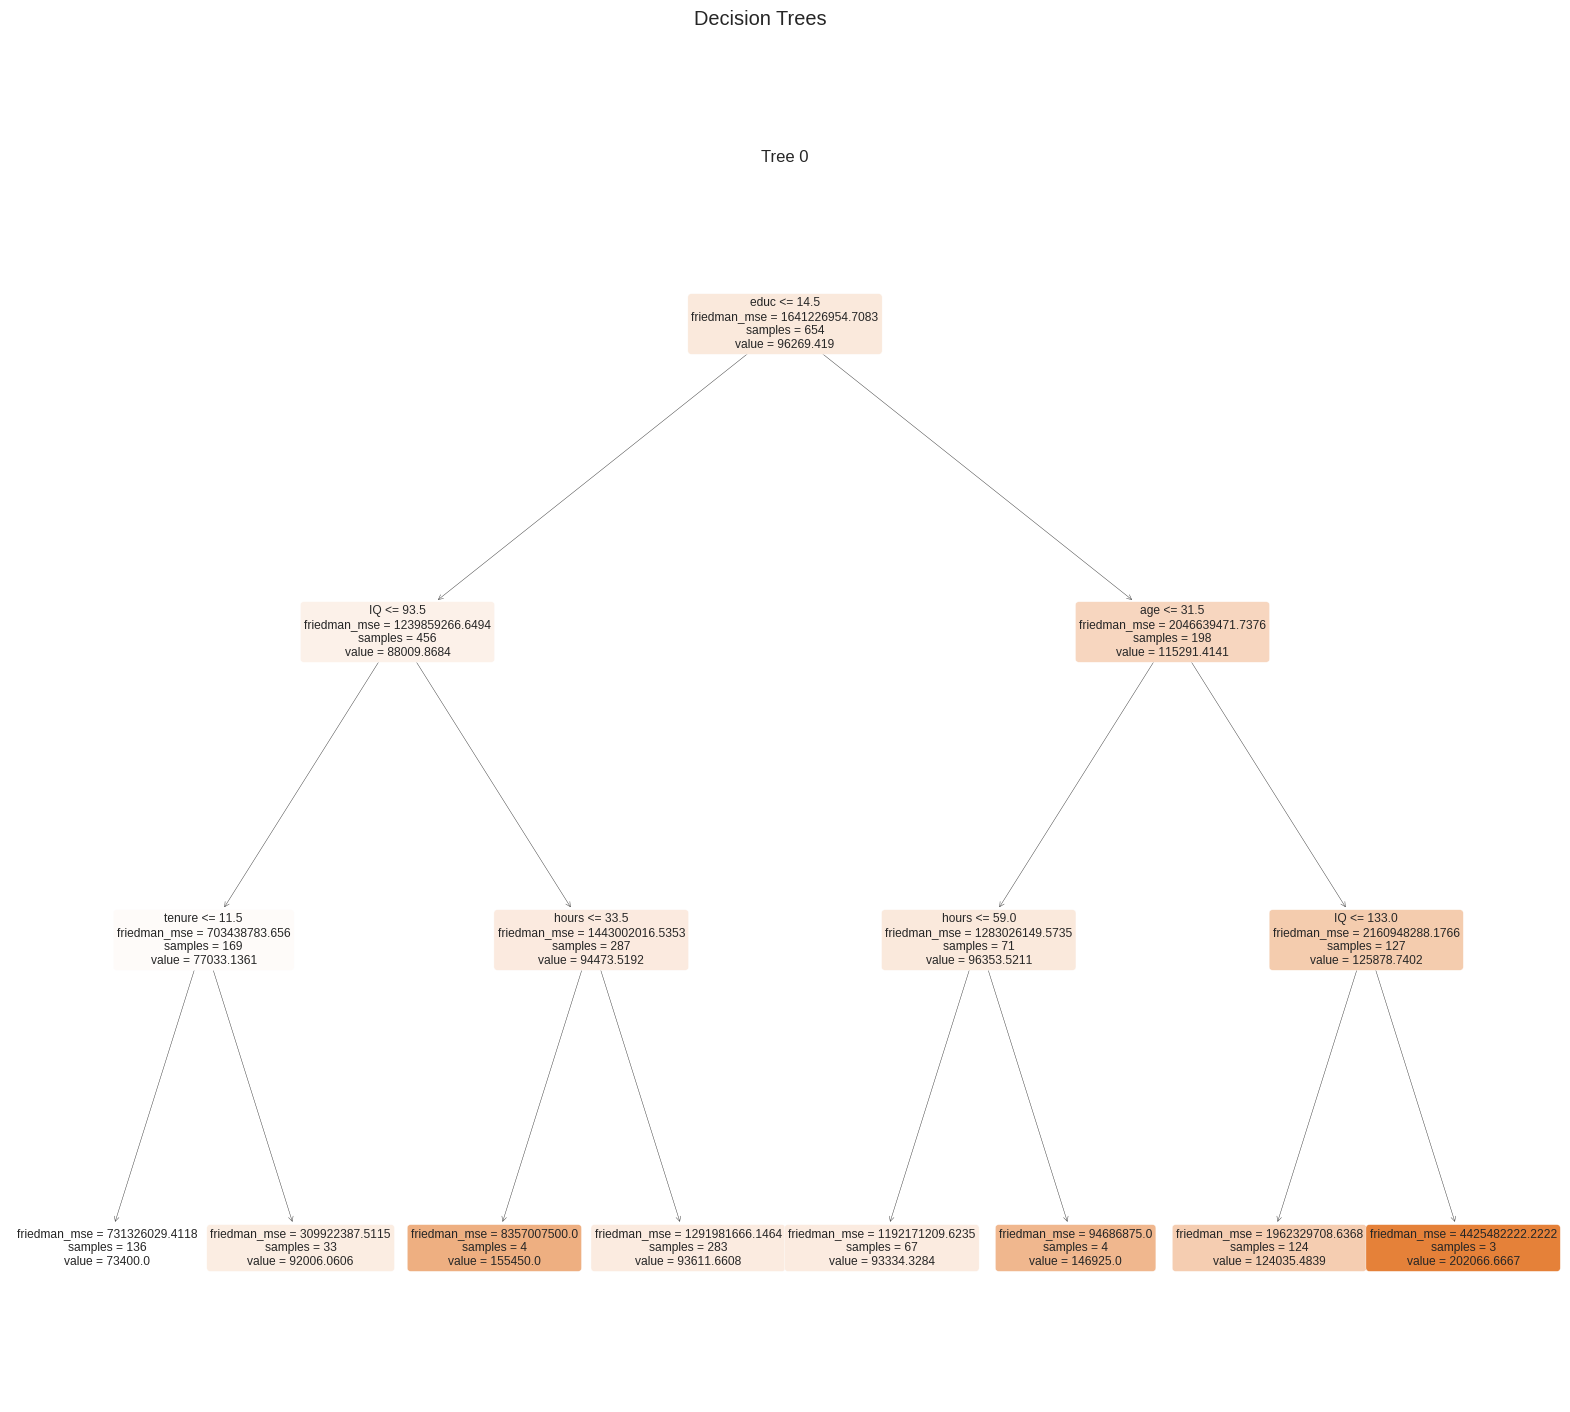

In [56]:
plot_model(tuned_dt_reg, plot = 'tree')

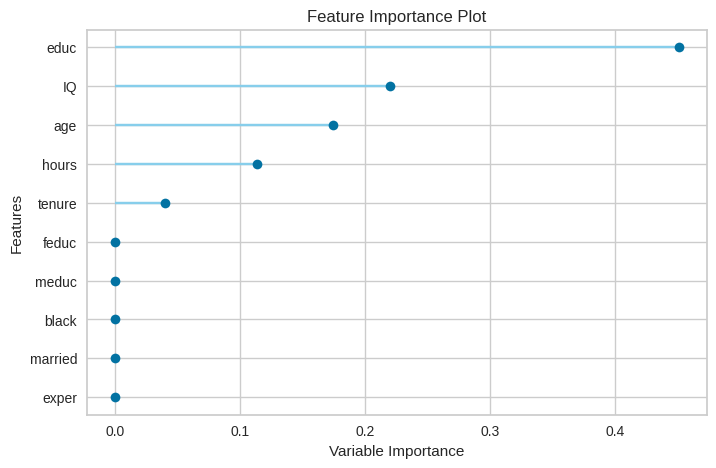

In [57]:
plot_model(tuned_dt_reg, plot = 'feature')

----
Done!

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Decision Trees visualization: https://mljar.com/blog/visualize-decision-tree/
